# Gamma Correction

> Gamma correction or gamma is a nonlinear operation used to encode and decode luminance or tristimulus values in video or still image systems

Formula: $ V_{out} = A * V_{in}^\gamma $

Recommend Reading: [Understanding gamma correction](https://www.cambridgeincolour.com/tutorials/gamma-correction.htm)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [10]:
img = cv2.imread('dog.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Add value

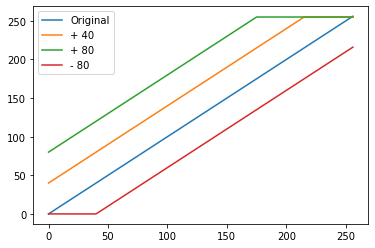

In [32]:
line = np.linspace(0, 256, 1000)
y0 = 40 + line
y0[y0 > 255] = 255
y0[y0 < 0] = 0

y1 = 80 + line
y1[y1 > 255] = 255
y1[y1 < 0] = 0

y2 = -40 + line
y2[y2 > 255] = 255
y2[y2 < 0] = 0

plt.plot(line, line, label='Original')
plt.plot(line, y0, label='+ 40')
plt.plot(line, y1, label='+ 80')
plt.plot(line, y2, label='- 80')
plt.legend()

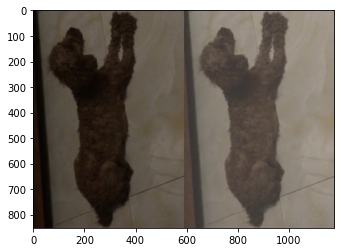

In [31]:
img_linear = img.copy()
rows, cols, deeps = img.shape
for i in range(rows):
    for j in range(cols):
        for d in range(deeps):
            img_linear[i][j][d] = max(max(0, a), min(a, 255)) if (a:= 50 + img_linear[i][j][d] or True) else a

plt.imshow(cv2.hconcat([img, img_linear]))

## Gamma correct

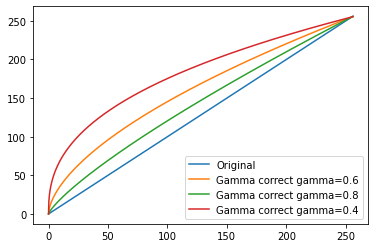

In [27]:
line = np.linspace(0, 256, 1000)
y0 = 255 * np.power(line/ 255, 0.6)
y1 = 255 * np.power(line/ 255, 0.8)
y2 = 255 * np.power(line/ 255, 0.4)
plt.plot(line, line, label='Original')
plt.plot(line, y0, label='Gamma correct gamma=0.6')
plt.plot(line, y1, label='Gamma correct gamma=0.8')
plt.plot(line, y2, label='Gamma correct gamma=0.4')
plt.legend()

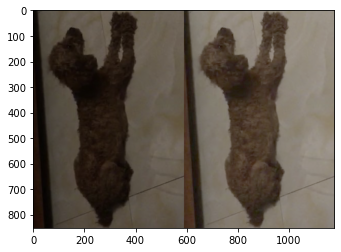

In [14]:
img_gamma_corrected = img.copy()
rows, cols, deeps = img.shape
for i in range(rows):
    for j in range(cols):
        for d in range(deeps):
            img_gamma_corrected[i][j][d] = 255 * pow(img_gamma_corrected[i][j][d] / 255, 0.6)

plt.imshow(cv2.hconcat([img, img_gamma_corrected]))